In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/farmer_advisor_dataset.csv')  # Replace with your actual file path

# Display the first few rows
print(df.head())

   Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm Crop_Type  \
0        1  7.073643      49.145359      26.668157   227.890912     Wheat   
1        2  6.236931      21.496115      29.325342   244.017493   Soybean   
2        3  5.922335      19.469042      17.666414   141.110521      Corn   
3        4  6.845120      27.974234      17.188722   156.785663     Wheat   
4        5  6.934171      33.637679      23.603899    77.859362      Corn   

   Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
0           131.692844            2.958215        1.576920   
1           136.370492           19.204770        3.824686   
2            99.725210           11.041066        1.133198   
3           194.832396            8.806271        8.870540   
4            57.271267            3.747553        8.779317   

   Sustainability_Score  
0             51.913649  
1             47.159077  
2             50.148418  
3             89.764557  
4             51.033941  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Farm_ID               10000 non-null  int64  
 1   Soil_pH               10000 non-null  float64
 2   Soil_Moisture         10000 non-null  float64
 3   Temperature_C         10000 non-null  float64
 4   Rainfall_mm           10000 non-null  float64
 5   Crop_Type             10000 non-null  object 
 6   Fertilizer_Usage_kg   10000 non-null  float64
 7   Pesticide_Usage_kg    10000 non-null  float64
 8   Crop_Yield_ton        10000 non-null  float64
 9   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB
None
           Farm_ID       Soil_pH  Soil_Moisture  Temperature_C   Rainfall_mm  \
count  10000.00000  10000.000000   10000.000000   10000.000000  10000.000000   
mean    5000.50000      6.499494      29.988655    

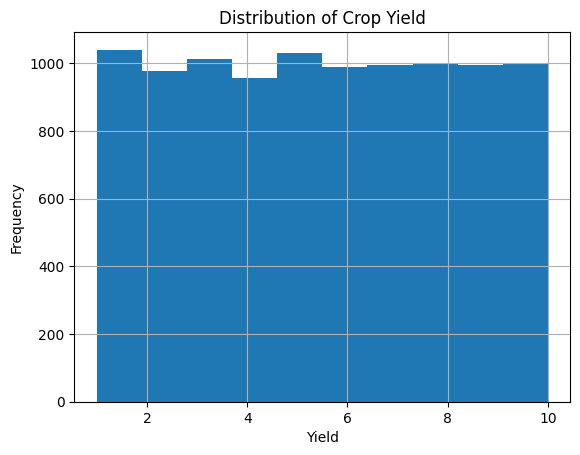

In [4]:
print(df.info())

# Describe statistical properties
print(df.describe())

# Plot a histogram of a relevant column, e.g., 'crop_yield'
df['Crop_Yield_ton'].hist()
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Drop Farm_ID as it's just an identifier
df = df.drop(columns=["Farm_ID"])

# Encode the categorical column 'Crop_Type'
le = LabelEncoder()
df['Crop_Type'] = le.fit_transform(df['Crop_Type'])

# Check data types and nulls
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Soil_pH               10000 non-null  float64
 1   Soil_Moisture         10000 non-null  float64
 2   Temperature_C         10000 non-null  float64
 3   Rainfall_mm           10000 non-null  float64
 4   Crop_Type             10000 non-null  int64  
 5   Fertilizer_Usage_kg   10000 non-null  float64
 6   Pesticide_Usage_kg    10000 non-null  float64
 7   Crop_Yield_ton        10000 non-null  float64
 8   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 703.3 KB
None


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Features (X) and Target (y)
X = df.drop("Crop_Yield_ton", axis=1)
y = df["Crop_Yield_ton"]
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Use Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)




GradientBoostingRegressor(random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))


Mean Squared Error: 6.86
R² Score: -0.01


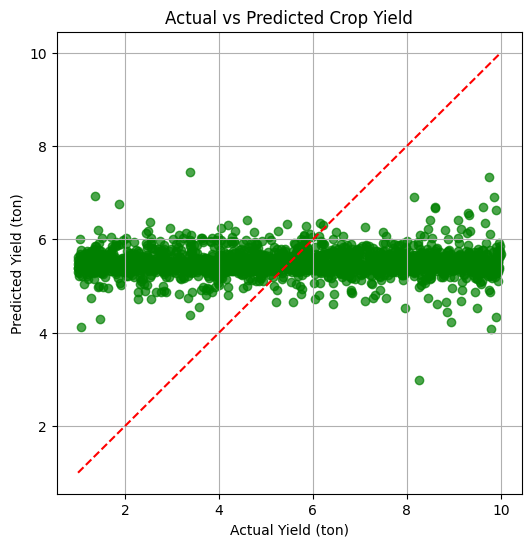

In [20]:
# Plot predicted vs actual yield
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel("Actual Yield (ton)")
plt.ylabel("Predicted Yield (ton)")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()


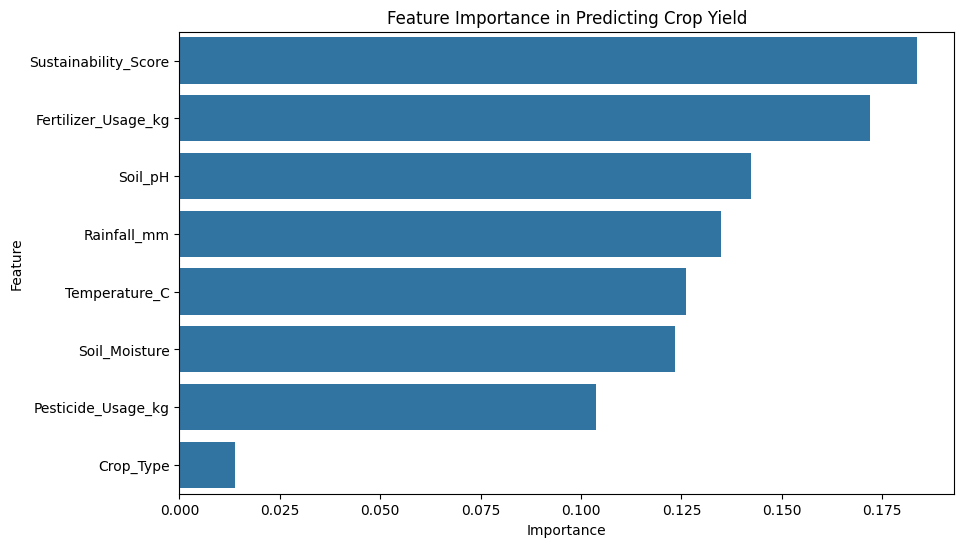

In [21]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance in Predicting Crop Yield')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
